In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [249]:
burrows = pd.read_csv("zip_borough.csv")
burrowszip = burrows.rename(columns={"zip":"Zipcode"})

In [186]:

evictions_data = pd.read_csv("Project_1/Evictions.clean.csv")
evictions_data.head()
evictions_data1 = evictions_data.rename(columns={'EVICTION_ZIP':"Zipcode"})
zip_eviction = evictions_data1.groupby('Zipcode').count()['EXECUTED_DATE']
zip_eviction.head()

Zipcode
0          3
1000       1
10001    300
10002    253
10003    125
Name: EXECUTED_DATE, dtype: int64

In [115]:
crime_data = pd.read_csv("Project_1/Finalcrime.csv")
crime_data.head()
zip_crime = crime_data.groupby('Zipcode').count()['ARREST_DATE']
zip_crime.to_frame().head()

,ARREST_DATE
Zipcode,
10001.0,11
10002.0,10
10003.0,7
10004.0,1
10007.0,3


In [180]:

parks_data = pd.read_csv('Project_1/Parks.csv')

parks1 = parks_data.rename(columns={'ZIPCODE':"Zipcode"})


zip_park = parks1.groupby('Zipcode').sum()['ACRES']
zip_park.to_frame().head()

,ACRES
Zipcode,
10001,3.337037
10002,50.239190
10004,25.518875
10007,14.032170
10011,14.149388


In [117]:

subway_data = pd.read_csv("Project_1/DABCHW\Subway.csv")
subway_data
subway_data.head()
zip_subway = subway_data.groupby('Zipcode').count()['Line']
zip_subway.to_frame().head()


,Line
Zipcode,
10001.0,36
10002.0,17
10003.0,28
10004.0,20
10005.0,9


In [252]:
crime_subwaymerge = pd.merge(zip_crime, zip_subway, how="outer", on='Zipcode')
crime_subwaymerge.head()

Park_Crime_Subway = pd.merge(crime_subwaymerge, zip_park, how="outer", on='Zipcode')
Park_Crime_Subway.head()

totalmerge1 = pd.merge(Park_Crime_Subway, zip_eviction, how="outer", on="Zipcode")
totalmerge1['ARREST_DATE'] = totalmerge1['ARREST_DATE'].apply(pd.to_numeric)
totalmerge1.dropna().head()


,ARREST_DATE,Line,ACRES,EXECUTED_DATE
Zipcode,,,,
10001.0,11.0,36.0,3.337037,300.0
10002.0,10.0,17.0,50.239190,253.0
10004.0,1.0,20.0,25.518875,17.0
10007.0,3.0,32.0,14.032170,19.0
10011.0,4.0,52.0,14.149388,154.0


In [261]:
totalmerge = pd.merge(totalmerge1, burrowszip, how='outer', on='Zipcode')
totalmerge.dropna().head()

,Zipcode,ARREST_DATE,Line,ACRES,EXECUTED_DATE,borough
0,10001.0,11.0,36.0,3.337037,300.0,Manhattan
1,10002.0,10.0,17.0,50.239190,253.0,Manhattan
3,10004.0,1.0,20.0,25.518875,17.0,Manhattan
4,10007.0,3.0,32.0,14.032170,19.0,Manhattan
7,10011.0,4.0,52.0,14.149388,154.0,Manhattan


TypeError: 'DataFrame' object is not callable

In [239]:

# parkseviction = plt.scatter(zip_subway, zip_park, marker='o', facecolor='coral', edgecolor='black', s=zip_crime, alpha=.75)
# zip_park.plot.scatter(x, y, s=None, c=None)

# ax1 = totalmerge.plot.scatter(x="EXECUTED_DATE", y='Line', marker='o', facecolor='coral', s="ARREST_DATE", edgecolor='black', alpha=.75)

# plt.xlabel("Evictions")
# plt.ylabel("Subway Enterances")
# plt.title("Number of Evictions and Subway Entrances in a Zipcode")


In [270]:
plt.scatter(x=(totalmerge.groupby.('borough')['Manhattan'])['EXECUTED_DATE'], y=(totalmerge.groupby.('borough')['Manhattan'])['Line'], marker='o', facecolor='coral', s=(totalmerge.groupby.('borough')['Manhattan'])["ARREST_DATE"]*20, edgecolor='black', alpha=.75)

plt.xlabel("Evictions")
plt.ylabel("Subway Enterances")
plt.title("Number of Evictions and Subway Entrances in a Zipcode")

SyntaxError: invalid syntax (<ipython-input-270-2a415c8527b1>, line 1)

Text(0.5, 1.0, 'Number of Evictions and Acres of Parks in a Zipcode')

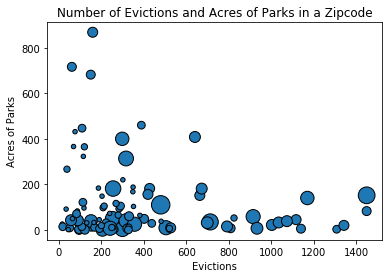

In [240]:
plt.scatter(x=totalmerge["EXECUTED_DATE"], y=totalmerge['ACRES'], marker='o', cmap='coral', s=totalmerge["ARREST_DATE"]*20, edgecolor='black')
plt.xlabel("Evictions")
plt.ylabel("Acres of Parks")
plt.title("Number of Evictions and Acres of Parks in a Zipcode")

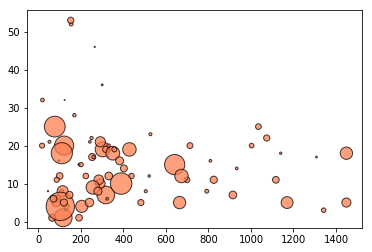

In [222]:
plt.scatter(x=totalmerge["EXECUTED_DATE"], y=totalmerge['Line'], marker='o', facecolor='coral', s=totalmerge["ACRES"], edgecolor='black', alpha=.75)

Text(0.5, 1.0, 'Number of Evictions and Acres of Parks in a Zipcode')

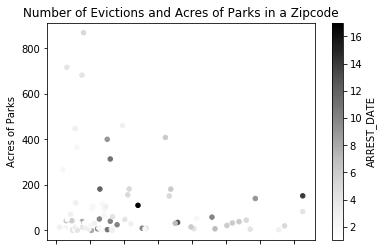

In [195]:
ax2 = totalmerge.plot.scatter(x="EXECUTED_DATE", y='ACRES', c='ARREST_DATE')
plt.xlabel("Evictions")
plt.ylabel("Acres of Parks")
plt.title("Number of Evictions and Acres of Parks in a Zipcode")

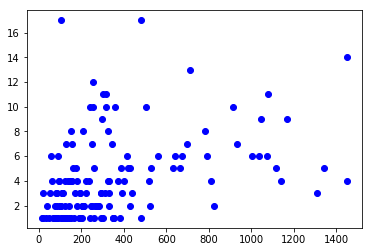

In [237]:
plt.plot(totalmerge['EXECUTED_DATE'], totalmerge['ARREST_DATE'], linewidth=0, marker="o", color="blue")